In [1]:
import sys
sys.path.append("../../")

from astronn import datasets
from astronn import models

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Create a dataset with 1Mll theoretical stars oscilations

In [2]:
star_models = datasets.starmodels()
df = star_models.load("/home/roberto/Downloads/dataall_parts/*", batch_size=150)

#### Print sample vectors from Dataset

In [3]:
for row in df.take(1):
    print(row)

(<tf.Tensor: id=1739, shape=(150, 406, 3), dtype=float32, numpy=
array([[[ 0.    ,  0.    ,  0.9999],
        [ 0.    ,  0.    ,  0.9901],
        [ 0.    ,  0.    ,  0.9152],
        ...,
        [ 0.    ,  0.    ,  0.0812],
        [ 0.    ,  0.    ,  0.079 ],
        [ 0.    ,  0.    ,  0.1127]],

       [[ 0.    ,  0.    ,  1.    ],
        [ 0.    ,  0.    ,  0.9896],
        [ 0.    ,  1.    ,  0.9107],
        ...,
        [ 0.    ,  0.    , -0.082 ],
        [ 0.    ,  0.    , -0.0743],
        [ 0.    ,  0.    ,  0.097 ]],

       [[ 0.    ,  0.    ,  1.    ],
        [ 0.    ,  1.    ,  0.9899],
        [ 0.    ,  0.    ,  0.9135],
        ...,
        [ 0.    ,  0.    ,  0.009 ],
        [ 0.    ,  0.    ,  0.0254],
        [ 0.    ,  0.    ,  0.0818]],

       ...,

       [[ 0.    ,  3.    ,  1.    ],
        [ 0.    ,  0.    ,  0.9919],
        [ 0.    ,  0.    ,  0.93  ],
        ...,
        [ 0.    ,  0.    , -0.044 ],
        [ 0.    ,  0.    , -0.0435],
        [ 0. 

In [4]:
def normalize(x):
    """
    """
    return (x - np.min(x)) / (np.max(x) - np.min(x))

#### Take one example

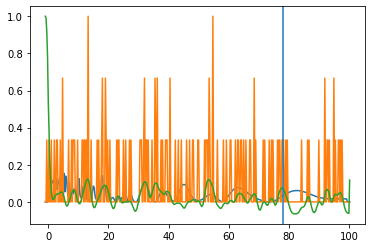

In [5]:
line = [line for line in df.take(1)]

x = np.arange(-1, 100.5, 0.25)
plt.plot(x, line[0][0][0,:,0])
plt.plot(x, normalize(line[0][0][0,:,1]))
plt.plot(x, line[0][0][0,:,2])

target = np.where(line[0][1][0].numpy().flat == 1)[0].flat[0]
plt.axvline(x=target)

#### Sampling to check non all-zeros one-hot vector target

In [6]:
aux = []
for row in df.take(50):
    for r in row[1]:
        if len(np.where(r[0])[0]) > 0:
            aux.append(np.where(r[0])[0][0])
        else:
            print(row)
            print(r[0])
            0 / 0

(array([ 373.,  528.,  798., 1084., 1234., 1267., 1130.,  545.,  319.,
         222.]),
 array([19., 27., 35., 43., 51., 59., 67., 75., 83., 91., 99.]),
 <a list of 10 Patch objects>)

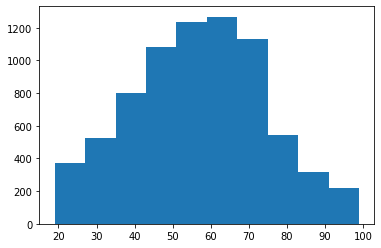

In [7]:
plt.hist(aux) # PLot histogram of targets

#### Create a Separable convolution model

In [8]:
sepconv_mod = models.separableconvnn() #init model
sepconv_mod.compile(learning_rate=0.001) # compile model

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv1d (SeparableC (None, 402, 20)           245       
_________________________________________________________________
average_pooling1d (AveragePo (None, 201, 20)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 201, 20)           80        
_________________________________________________________________
dropout (Dropout)            (None, 201, 20)           0         
_________________________________________________________________
flatten (Flatten)            (None, 4020)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               402100    
Total params: 402,425
Traina

#### Train model with dataset

In [9]:
history = sepconv_mod.model.fit(df, steps_per_epoch=100, epochs=50)

Train for 100 steps
Epoch 1/50
100/100 [==============================] - 9s 85ms/step - loss: 3.0486 - accuracy: 0.0167
Epoch 2/50
100/100 [==============================] - 7s 74ms/step - loss: 2.1229 - accuracy: 0.0176
Epoch 3/50
100/100 [==============================] - 8s 75ms/step - loss: 1.8295 - accuracy: 0.0178
Epoch 4/50
100/100 [==============================] - 7s 73ms/step - loss: 1.8137 - accuracy: 0.0189
Epoch 5/50
  2/100 [..............................] - ETA: 7s - loss: 1.7669 - accuracy: 0.0206

KeyboardInterrupt: 

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

NameError: name 'history' is not defined

#### Save models and weigths on disk

In [11]:
sepconv_mod.save("/tmp/sepconvnn_dos")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/sepconvnn_dos/assets


#### Inference on one sample star

In [12]:
for row in df.take(1):
    print("Batch shape (%s %s)" % (row[0].shape, row[1].shape))
    # Select first row on the batch
    X_star_test = row[0][0].numpy()
    y_star_test = row[1][0].numpy()
    
y_hats = sepconv_mod.predict_classes(X_star_test.reshape(1, 406, 3))
print("\nInference: Y_hat=%s | Y_test=%s" % (y_hats, np.where(y_star_test[0]==1)[0]))

NameError: name 'df' is not defined